In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
df = pd.read_csv('bank-full.csv')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [21]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [48]:
df=df.replace('unknown',np.nan)
null_dict = {}
for i in range(len(df.columns)):
    null_dict.update({df.columns[i]:df[df.columns[i]].isnull().sum()/len(df[df.columns[i]])*100})

In [49]:
null_dict

{'age': 0.0,
 'job': 0.6370131162770122,
 'marital': 0.0,
 'education': 4.1074074893278185,
 'default': 0.0,
 'balance': 0.0,
 'housing': 0.0,
 'loan': 0.0,
 'contact': 28.798301298356595,
 'day': 0.0,
 'month': 0.0,
 'duration': 0.0,
 'campaign': 0.0,
 'pdays': 0.0,
 'previous': 0.0,
 'poutcome': 81.74780473778506,
 'Target': 0.0}

In [54]:
df.nunique()

age            77
job            11
marital         3
education       3
default         2
balance      7168
housing         2
loan            2
contact         2
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        3
Target          2
dtype: int64

In [66]:
cat_col=df.columns.drop(['age','balance','duration','pdays','day','previous','campaign'])
for column in cat_col:
    print(df[column].value_counts())
    print('__'*50)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
____________________________________________________________________________________________________
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
____________________________________________________________________________________________________
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64
____________________________________________________________________________________________________
no     44396
yes      815
Name: default, dtype: int64
____________________________________________________________________________________________________
yes    25130
no     20081
Name: housing, dtype: int64
_____________________________________________________

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


C:\Users\geost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

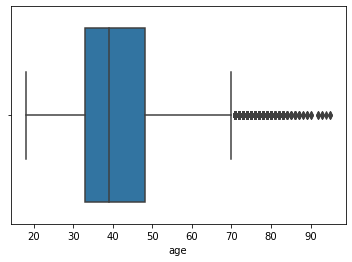

In [72]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

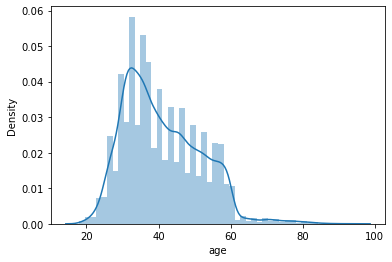

In [74]:
sns.distplot(df['age'])

In [75]:
df.columns.drop(cat_col)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

C:\Users\geost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

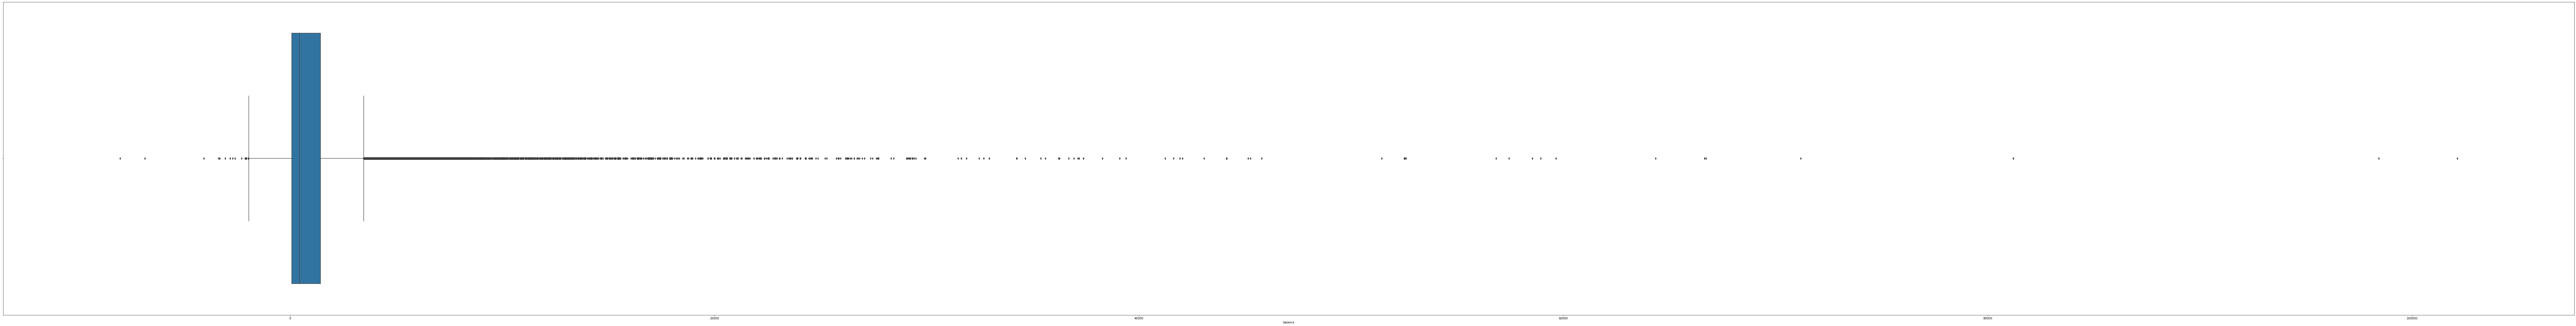

In [88]:
plt.figure(figsize=((160,20)))
sns.boxplot(df['balance'])


C:\Users\geost\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

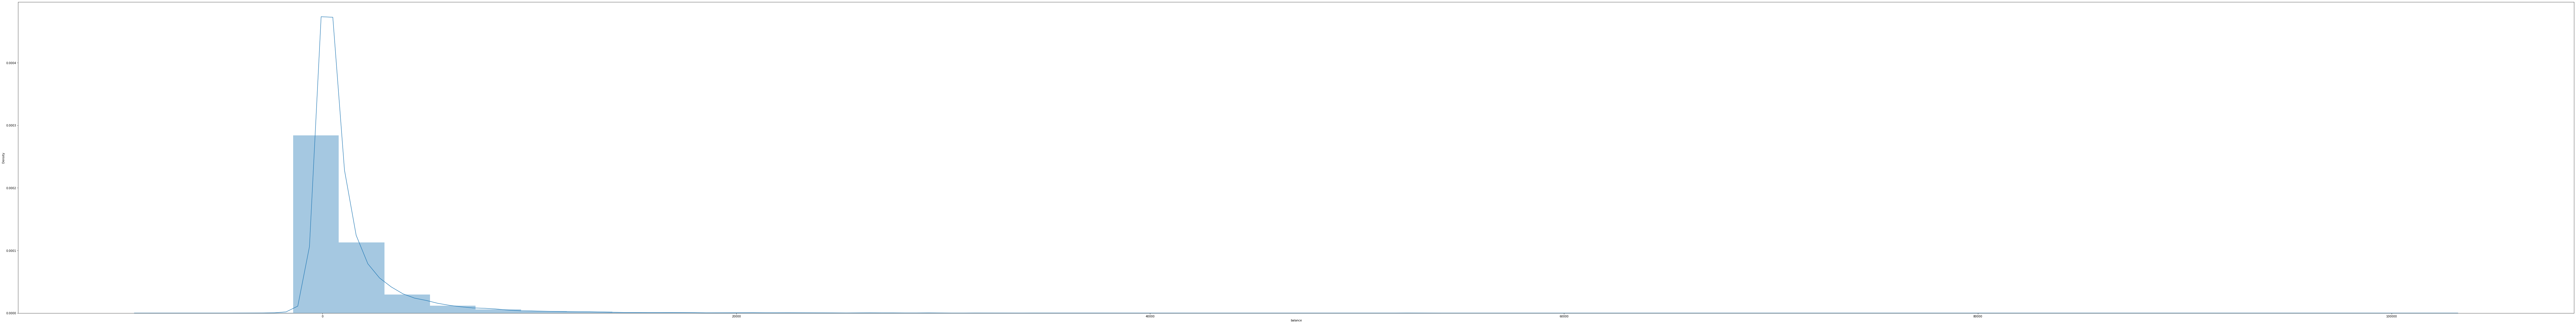

In [90]:
plt.figure(figsize=((160,20)))
sns.distplot(df['balance'])

C:\Users\geost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

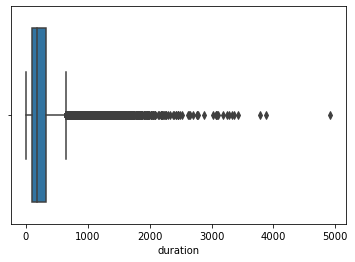

In [91]:
sns.boxplot(df['duration'])

C:\Users\geost\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

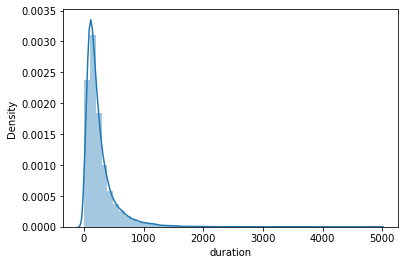

In [92]:
sns.distplot(df['duration'])

In [106]:
from sklearn.impute import SimpleImputer
num_col=df.columns.drop(cat_col)
simp1=SimpleImputer(strategy='median')
simp2=SimpleImputer(strategy='most_frequent')
df[cat_col]=simp2.fit_transform(df[cat_col])
df[num_col]=simp1.fit_transform(df[num_col])

In [109]:
for i in range(len(df.columns)):
    null_dict.update({df.columns[i]:df[df.columns[i]].isnull().sum()/len(df[df.columns[i]])*100})

In [111]:
null_dict

{'age': 0.0,
 'job': 0.0,
 'marital': 0.0,
 'education': 0.0,
 'default': 0.0,
 'balance': 0.0,
 'housing': 0.0,
 'loan': 0.0,
 'contact': 0.0,
 'day': 0.0,
 'month': 0.0,
 'duration': 0.0,
 'campaign': 0.0,
 'pdays': 0.0,
 'previous': 0.0,
 'poutcome': 0.0,
 'Target': 0.0}

In [112]:
df=pd.get_dummies(df, columns=cat_col, drop_first=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   job_blue-collar      45211 non-null  uint8  
 8   job_entrepreneur     45211 non-null  uint8  
 9   job_housemaid        45211 non-null  uint8  
 10  job_management       45211 non-null  uint8  
 11  job_retired          45211 non-null  uint8  
 12  job_self-employed    45211 non-null  uint8  
 13  job_services         45211 non-null  uint8  
 14  job_student          45211 non-null  uint8  
 15  job_technician       45211 non-null 

In [122]:
from sklearn.model_selection import train_test_split
X=df.drop('Target_yes',axis=1)
y=df['Target_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
def get_metrics(model):
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print("Accuracy on training set : ",model.score(X_train,y_train))
    print("Accuracy on test set : ",model.score(X_test,y_test))
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
    print("Precision on test set : ",metrics.precision_score(y_test,pred_test))    

In [131]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
get_metrics(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8686965496903568
Recall on training set :  1.0
Recall on test set :  0.4718397997496871
Precision on training set :  1.0
Precision on test set :  0.44589000591366057


In [134]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }
grid = GridSearchCV(DecisionTreeClassifier(),parameters,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits
[CV 1/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=2, min_impu

[CV 4/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 

[CV 3/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s


[CV 1/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.892 total time=

[CV 2/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5]

[CV 1/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.897 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.892 total ti

[CV 5/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.897 tot

[CV 3/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=2, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5]

[CV 5/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/

[CV 4/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.893 total t

[CV 4/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END ma

[CV 2/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5]

[CV 3/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.902 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.903 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.903 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.899 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.899 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.903 total

[CV 2/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 

[CV 5/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s


[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s


[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3

[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/

[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.896 total time=   0.0s


[CV 1/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.901 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.899 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.902 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.902 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.903 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.901 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.899 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.902 tot

[CV 2/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0

[CV 3/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.899 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.903 total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.899 total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.899 total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.903 total time=

[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=

[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] E

[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.

[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.894 total time=

[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max

[CV 4/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.903 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total time=   0

[CV 2/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.903 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.902 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.902 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.903 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.902

[CV 3/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5]

[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5]

[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.894 total ti

[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END m

[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5]

[CV 5/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total tim

[CV 1/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4

[CV 5/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s


[CV 4/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s


[CV 3/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0

[CV 3/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV

[CV 4/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s


[CV 3/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.905 tot

[CV 2/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s


[CV 3/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.905 total time=

[CV 5/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=

[CV 4/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max

[CV 4/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5]

[CV 3/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.888 total time=  

[CV 5/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV

[CV 1/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s


[CV 2/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=

[CV 3/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=8, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   

[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 

[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s


[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=

[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3

[CV 1/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.898 total time=

[CV 2/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.904 tot

[CV 5/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.

[CV 1/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=

[CV 2/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 tot

[CV 2/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0

[CV 2/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.896 total time=

[CV 1/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0

[CV 4/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0

[CV 2/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=10, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900

[CV 3/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 tot

[CV 2/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5]

[CV 2/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s


[CV 3/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.88

[CV 4/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5]

[CV 1/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=

[CV 3/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, sc

[CV 3/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=11, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s


[CV 3/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.88

[CV 1/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4

[CV 3/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s


[CV 1/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.898 tot

[CV 2/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.904 tot

[CV 4/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=12, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time

[CV 1/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=

[CV 3/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total tim

[CV 4/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s

[CV 1/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.892 total time=

[CV 2/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total t

[CV 5/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total tim

[CV 5/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=13, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 tot

[CV 1/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 tot

[CV 1/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0

[CV 2/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total t

[CV 1/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.892 tot

[CV 2/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5]

[CV 4/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total t

[CV 4/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=

[CV 2/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=14, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=

[CV 4/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.893 total time=   0.0s


[CV 5/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s


[CV 2/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 tot

[CV 4/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.896

[CV 4/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=15, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total t

[CV 4/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.883 total time

[CV 2/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 tot

[CV 4/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 

[CV 1/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.892 total ti

[CV 3/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0

[CV 5/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=16, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 t

[CV 2/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.883

[CV 3/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5]

[CV 3/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s


[CV 4/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.893

[CV 5/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/

[CV 5/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=

[CV 2/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 tot

[CV 5/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=17, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time

[CV 5/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0

[CV 3/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=

[CV 4/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.893 total t

[CV 5/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0

[CV 2/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 tot

[CV 1/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0

[CV 3/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=18, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total 

[CV 4/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.883 total time

[CV 5/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.894 tot

[CV 2/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5]

[CV 5/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total ti

[CV 1/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0

[CV 4/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=19, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 t

[CV 1/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.883 tot

[CV 1/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5]

[CV 4/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total t

[CV 5/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.894 tot

[CV 3/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5]

[CV 5/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.894 total tim

[CV 2/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, sco

[CV 4/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=20, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s

[CV 5/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.888 t

[CV 5/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.

[CV 2/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s


[CV 4/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.897 tot

[CV 1/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0

[CV 2/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=21, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total t

[CV 5/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.883 total time=

[CV 3/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 tot

[CV 5/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.

[CV 2/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.896 total time=

[CV 3/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0

[CV 3/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=  

[CV 4/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=22, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.897 to

[CV 4/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 tot

[CV 3/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[C

[CV 3/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total 

[CV 1/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.892 tot

[CV 4/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5]

[CV 2/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 tot

[CV 3/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0

[CV 4/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=23, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s


[CV 5/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0

[CV 1/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 

[CV 5/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/

[CV 5/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s


[CV 2/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0

[CV 3/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   

[CV 1/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=24, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=

[CV 3/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=

[CV 2/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 tot

[CV 5/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.

[CV 1/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.892 total time=

[CV 2/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0

[CV 3/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total 

[CV 5/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=25, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 tot

[CV 4/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 tot

[CV 2/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total ti

[CV 3/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 tot

[CV 1/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5]

[CV 4/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893

[CV 1/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.904 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0

[CV 4/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=26, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=2, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.883 total time=   0.0s


[CV 1/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.888 t

[CV 3/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=3, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV

[CV 3/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=5, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s


[CV 1/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.898 tot

[CV 5/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total ti

[CV 1/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=27, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=

[CV 5/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.883 total time=

[CV 5/5] END max_depth=28, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.894 total

[CV 5/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0

[CV 4/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=5, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.893 total time=

[CV 3/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0

[CV 5/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=10, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total ti

[CV 4/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=5;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=28, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.897 tot

[CV 5/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.883 tot

[CV 3/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=1;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=2, min_impurity_decrease=0.1, min_samples_leaf=2;, score=0.883 total time=   0.0s
[CV 1/5]

[CV 5/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.001, min_samples_leaf=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=3, min_impurity_decrease=0.01, min_samples_leaf=1;, score=0.894 total ti

[CV 5/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=7;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.894 t

[CV 5/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=5;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 3/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=7;, score=0.883 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=5, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s
[CV 3/

[CV 5/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=5;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_leaf=7;, score=0.894 total time=

[CV 5/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=10;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=1;, score=0.905 total time=   0.0s
[CV 1/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.001, min_samples_leaf=2;, score=0.900 t

[CV 5/5] END max_depth=29, max_leaf_nodes=15, min_impurity_decrease=0.1, min_samples_leaf=10;, score=0.883 total time=   0.0s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_leaf_nodes': [2, 3, 5, 10, 15],
                         'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1],
                         'min_samples_leaf': [1, 2, 5, 7, 10]},
             verbose=3)

In [137]:
dtree_est = grid
get_metrics(dtree_est)

Accuracy on training set :  0.9036875533225898
Accuracy on test set :  0.8990710704806841
Recall on training set :  0.40151720400975344
Recall on test set :  0.3879849812265332
Precision on training set :  0.6385178802240413
Precision on test set :  0.6132542037586548


In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()
rfc.fit(X_train,y_train)
get_metrics(rfc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9050427602477146
Recall on training set :  1.0
Recall on test set :  0.41051314142678347
Precision on training set :  1.0
Precision on test set :  0.654690618762475


In [144]:
parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}
grid = GridSearchCV(RandomForestClassifier(),parameters,refit=True,verbose=3)
grid.fit(X_train,y_train)
rfc_tuned = grid


Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.894 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.891 total ti

[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.895 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.896 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.893 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.893 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.894 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.892 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.894 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, min_sample

[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.895 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.893 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.894 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.892 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.890 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.894 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.893 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=sqrt, min

[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.894 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.893 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.890 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.894 total time=   0.6s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.894 total time=   0.7s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.895 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.893 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=sqrt, min

[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.893 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.894 total time=   0.6s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.893 total time=   0.7s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.895 total time=   0.6s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.891 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.892 total time=   0.7s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=10;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, min_s

[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.893 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.892 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.893 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.894 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=30;, score=0.892 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=30;, score=0.890 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=30;, score=0.892 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, min

[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.895 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.895 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.893 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=50;, score=0.890 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=50;, score=0.892 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=50;, score=0.894 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=50;, score=0.896 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=sqrt, min

[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.895 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.892 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=70;, score=0.893 total time=   1.5s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=70;, score=0.889 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=70;, score=0.895 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=70;, score=0.894 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=70;, score=0.893 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=sqrt, min

[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.893 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=90;, score=0.893 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=90;, score=0.894 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=90;, score=0.891 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=90;, score=0.895 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=90;, score=0.894 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=100;, score=0.889 total time=   0.6s
[CV 2/5] END max_depth=5, max_features=sqrt, mi

[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.893 total time=   0.7s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=10;, score=0.889 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=10;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=10;, score=0.893 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=20;, score=0.893 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=s

[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.888 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.889 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.888 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.888 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.891 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=log2, min_sample

[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=50;, score=0.889 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=50;, score=0.890 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=50;, score=0.893 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=50;, score=0.890 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=50;, score=0.891 total time=   0.3s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=60;, score=0.889 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=60;, score=0.888 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=log2, min_sample

[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=70;, score=0.888 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=70;, score=0.892 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=70;, score=0.890 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=70;, score=0.893 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=80;, score=0.887 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=80;, score=0.892 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=80;, score=0.893 total time=   0.6s
[CV 4/5] END max_depth=5, max_features=log2, min

[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=90;, score=0.891 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=90;, score=0.889 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=90;, score=0.890 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=100;, score=0.888 total time=   0.6s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=100;, score=0.891 total time=   0.6s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=100;, score=0.891 total time=   0.6s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=100;, score=0.891 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=log2,

[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=20;, score=0.887 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=20;, score=0.891 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=20;, score=0.895 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=20;, score=0.891 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=30;, score=0.889 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=30;, score=0.890 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_sample

[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=40;, score=0.893 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=40;, score=0.891 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=40;, score=0.893 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=40;, score=0.894 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=50;, score=0.888 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=50;, score=0.889 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=50;, score=0.891 total time=   0.3s
[CV 4/5] END max_depth=5, max_features=log2, min

[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=60;, score=0.895 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=60;, score=0.893 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=60;, score=0.893 total time=   0.4s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=70;, score=0.888 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=70;, score=0.887 total time=   0.4s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=70;, score=0.888 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=70;, score=0.890 total time=   0.4s
[CV 5/5] END max_depth=5, max_features=log2, min

[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=80;, score=0.890 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=80;, score=0.892 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=90;, score=0.889 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=90;, score=0.890 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=90;, score=0.892 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=90;, score=0.891 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=90;, score=0.890 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=log2, min

[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=100;, score=0.889 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=10;, score=0.886 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=10;, score=0.892 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=10;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=20;, score=0.886 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=lo

[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=20;, score=0.894 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=30;, score=0.887 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=30;, score=0.888 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=30;, score=0.888 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=30;, score=0.889 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=30;, score=0.892 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=40;, score=0.889 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=lo

[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.903 total time=   1.9s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.899 total time=   2.1s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.903 total time=   1.7s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.901 total time=   1.8s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.905 total time=   1.5s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.903 total time=   1.8s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.900 total time=   1.8s
[CV 3/5] END max_depth=5, max_features=None, min_sample

[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=70;, score=0.899 total time=   1.9s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=70;, score=0.904 total time=   2.0s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=70;, score=0.903 total time=   2.0s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=70;, score=0.904 total time=   2.0s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=80;, score=0.902 total time=   2.2s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=80;, score=0.900 total time=   2.3s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=80;, score=0.903 total time=   2.3s
[CV 4/5] END max_depth=5, max_features=None, min_sample

[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=90;, score=0.904 total time=   2.5s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=90;, score=0.903 total time=   2.5s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=90;, score=0.904 total time=   2.4s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.903 total time=   2.7s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.899 total time=   2.8s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.904 total time=   3.0s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.903 total time=   3.2s
[CV 5/5] END max_depth=5, max_features=None,

[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=10;, score=0.901 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=10;, score=0.904 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=20;, score=0.903 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=20;, score=0.899 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=20;, score=0.904 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=20;, score=0.904 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=20;, score=0.905 total time=   0.5s
[CV 1/5] END max_depth=5, max_features=None, min_sample

[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=30;, score=0.905 total time=   0.8s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=40;, score=0.902 total time=   1.2s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=40;, score=0.899 total time=   1.4s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=40;, score=0.903 total time=   1.1s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=40;, score=0.903 total time=   1.5s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=40;, score=0.904 total time=   1.9s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=0.902 total time=   2.2s
[CV 2/5] END max_depth=5, max_features=None, min_sample

[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=60;, score=0.903 total time=   1.6s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=60;, score=0.899 total time=   1.6s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=60;, score=0.903 total time=   1.6s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=60;, score=0.904 total time=   1.6s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=60;, score=0.903 total time=   1.6s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.903 total time=   1.8s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.900 total time=   1.9s
[CV 3/5] END max_depth=5, max_features=None, min

[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=80;, score=0.900 total time=   2.6s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=80;, score=0.904 total time=   2.4s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=80;, score=0.902 total time=   2.4s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=80;, score=0.904 total time=   2.6s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.903 total time=   3.8s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.900 total time=   5.5s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.904 total time=   6.1s
[CV 4/5] END max_depth=5, max_features=None, min

[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=100;, score=0.904 total time=   3.2s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=100;, score=0.903 total time=   2.9s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=100;, score=0.904 total time=   5.8s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.902 total time=   0.8s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.899 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.906 total time=   0.4s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.901 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=None, 

[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=20;, score=0.901 total time=   0.6s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=20;, score=0.903 total time=   0.6s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.902 total time=   0.8s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.900 total time=   1.0s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.903 total time=   1.1s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.902 total time=   0.9s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.904 total time=   0.9s
[CV 1/5] END max_depth=5, max_features=No

[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=40;, score=0.903 total time=   1.2s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=40;, score=0.905 total time=   1.2s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.903 total time=   1.7s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.900 total time=   2.2s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.903 total time=   1.9s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.902 total time=   2.2s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.905 total time=   2.0s
[CV 1/5] END max_depth=5, max_features=No

[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.899 total time=   1.0s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.900 total time=   1.0s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.900 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.899 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.901 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.899 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.898 total time=   1.1s
[CV 1/5] END max_depth=10, max_features=sqrt, mi

[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=80;, score=0.897 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.902 total time=   1.8s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.899 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.901 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.898 total time=   1.4s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.898 total time=   1.6s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.901 total time=   1.6s
[CV 2/5] END max_depth=10, max_features=sqrt, m

[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100;, score=0.897 total time=   1.8s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=10;, score=0.900 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=10;, score=0.899 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=10;, score=0.900 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=10;, score=0.901 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=10;, score=0.901 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.898 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=

[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=20;, score=0.898 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.900 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.900 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.900 total time=   0.4s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.899 total time=   0.4s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.897 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.900 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=sqrt, mi

[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=0.900 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=0.900 total time=   0.5s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=0.901 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=0.900 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=0.897 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.899 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.898 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=sqrt, mi

[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.901 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.899 total time=   1.0s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.899 total time=   1.5s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.899 total time=   1.8s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.899 total time=   1.0s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.897 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=s

[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.901 total time=   1.2s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.897 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.898 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.898 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.897 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.900 total time=   1.6s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.899 total time=   1.2s
[CV 3/5] END max_depth=10, max_features

[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=10;, score=0.898 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.898 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=s

[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.897 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.900 total time=   0.4s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.899 total time=   0.4s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=30;, score=0.898 total time=   0.4s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.899 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.897 total time=   0.5s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.900 total time=   0.8s
[CV 4/5] END max_depth=10, max_fea

[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.897 total time=   0.5s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.899 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.899 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=50;, score=0.897 total time=   0.7s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.901 total time=   0.9s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.901 total time=   0.8s
[CV 4/5] END max_depth=10, max_fea

[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.895 total time=   0.7s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.900 total time=   0.7s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.898 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.897 total time=   0.8s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.900 total time=   0.9s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.897 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.899 total time=   0.9s
[CV 4/5] END max_depth=10, max_features=log2, mi

[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.898 total time=   1.0s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.896 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90;, score=0.895 total time=   1.1s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.899 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.898 total time=   1.0s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.900 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.898 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=log2

[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=10;, score=0.897 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=10;, score=0.897 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.896 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.896 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.898 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.898 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.899 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=l

[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.900 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=30;, score=0.895 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.900 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.900 total time=   0.4s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.897 total time=   0.4s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.895 total time=   0.4s
[CV 1/5] END max_depth=10, max_features=log2, mi

[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=0.894 total time=   0.4s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.900 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.896 total time=   0.5s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.897 total time=   0.7s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.897 total time=   0.9s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.896 total time=   0.8s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.898 total time=   0.7s
[CV 2/5] END max_depth=10, max_features=log2, mi

[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=70;, score=0.895 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.901 total time=   1.1s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.897 total time=   0.9s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.900 total time=   0.9s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.897 total time=   0.8s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.895 total time=   0.8s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.899 total time=   1.0s
[CV 2/5] END max_depth=10, max_features=l

[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=90;, score=0.897 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.899 total time=   1.8s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.897 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.898 total time=   1.2s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.898 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.896 total time=   1.2s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.899 total time=   0.1s
[CV 2/5] END max_depth=10, max_featu

[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.897 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.897 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.898 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.898 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.898 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.897 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=l

[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.899 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.897 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.897 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.896 total time=   0.4s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.895 total time=   0.4s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.899 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.898 total time=   0.5s
[CV 3/5] END max_depth=10, max_fea

[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.900 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.896 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.898 total time=   0.7s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.897 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.895 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.900 total time=   0.7s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.897 total time=   0.6s
[CV 3/5] END max_depth=10, max_fea

[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.902 total time=   3.9s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.900 total time=   3.9s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.907 total time=   4.0s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.905 total time=   4.7s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.908 total time=   4.5s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.900 total time=   7.2s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.899 total time=   5.8s
[CV 3/5] END max_depth=10, max_features=None, mi

[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.900 total time=   5.9s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.906 total time=   5.8s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.903 total time=   5.8s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.908 total time=   5.8s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.902 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.897 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.903 total time=   0.5s
[CV 4/5] END max_depth=10, max_features=N

[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.898 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.908 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.903 total time=   1.8s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.905 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.902 total time=   1.6s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.899 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.909 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=N

[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.899 total time=   2.4s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.907 total time=   2.1s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.902 total time=   2.0s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.905 total time=   2.0s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.902 total time=   2.5s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.900 total time=   2.7s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.906 total time=   2.8s
[CV 4/5] END max_depth=10, max_features=None, mi

[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.906 total time=   4.1s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.904 total time=   4.1s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.906 total time=   3.5s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.904 total time=   3.6s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.900 total time=   3.6s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.906 total time=   3.5s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.903 total time=   3.6s
[CV 5/5] END max_depth=10, max_features=None, mi

[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.906 total time=   3.8s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.905 total time=   3.8s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.907 total time=   3.7s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.903 total time=   4.2s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.899 total time=   4.1s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.907 total time=   4.0s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.903 total time=   4.0s
[CV 5/5] END max_depth=10, max_features=N

[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.907 total time=   5.0s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.903 total time=   5.0s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.904 total time=   5.0s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.904 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.898 total time=   0.4s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.906 total time=   0.4s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=10, max_feature

[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.905 total time=   1.0s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.905 total time=   1.0s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.907 total time=   1.0s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.904 total time=   1.5s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.900 total time=   1.6s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.908 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.906 total time=   1.5s
[CV 5/5] END max_depth=10, max_features=N

[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.907 total time=   2.4s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.904 total time=   2.5s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.908 total time=   2.5s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.902 total time=   3.2s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.901 total time=   3.2s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.909 total time=   3.2s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.906 total time=   3.2s
[CV 5/5] END max_depth=10, max_fea

[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.909 total time=   3.2s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.905 total time=   3.1s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.908 total time=   3.5s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.902 total time=   3.9s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.901 total time=   3.7s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.910 total time=   3.6s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.905 total time=   3.6s
[CV 5/5] END max_depth=10, max_fea

[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.906 total time=   1.2s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.904 total time=   1.2s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.903 total time=   1.2s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.903 total time=   1.3s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.900 total time=   1.6s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.906 total time=   1.4s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.903 total time=   1.3s
[CV 5/5] END max_depth=15, max_features=sqrt, mi

[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.904 total time=   2.3s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.904 total time=   2.2s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.898 total time=   0.1s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.898 total time=   0.1s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.903 total time=   0.1s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.901 total time=   0.1s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.902 total time=   0.1s
[CV 1/5] END max_depth=15, max_features=s

[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.902 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=20;, score=0.904 total time=   0.4s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.900 total time=   0.6s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.901 total time=   0.6s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.908 total time=   0.6s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.903 total time=   0.6s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.906 total time=   0.6s
[CV 1/5] END max_depth=15, max_features=s

[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.902 total time=   0.8s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=40;, score=0.902 total time=   0.8s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.900 total time=   1.0s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.898 total time=   1.1s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.906 total time=   1.2s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.902 total time=   1.0s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.902 total time=   1.0s
[CV 1/5] END max_depth=15, max_features=sqrt, mi

[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=60;, score=0.903 total time=   0.9s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.902 total time=   1.1s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.901 total time=   1.1s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.905 total time=   1.0s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.902 total time=   1.0s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.901 total time=   1.1s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.902 total time=   1.3s
[CV 2/5] END max_depth=15, max_features=sqrt, mi

[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=80;, score=0.902 total time=   1.0s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.904 total time=   1.1s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.901 total time=   1.1s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.906 total time=   1.3s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.901 total time=   1.3s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.902 total time=   1.3s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.902 total time=   1.5s
[CV 2/5] END max_depth=15, max_features=

[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=100;, score=0.902 total time=   1.4s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.900 total time=   0.1s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.1s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.904 total time=   0.1s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.901 total time=   0.1s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.899 total time=   0.1s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.901 total time=   0.2s
[CV 2/5] END max_depth=15, max_features=

[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=20;, score=0.898 total time=   0.2s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.901 total time=   0.3s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.901 total time=   0.5s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.901 total time=   0.4s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.900 total time=   0.4s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.900 total time=   0.4s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.901 total time=   0.9s
[CV 2/5] END max_depth=15, max_features=s

[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=40;, score=0.901 total time=   0.8s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.902 total time=   1.2s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.899 total time=   1.6s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.902 total time=   1.4s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.900 total time=   1.0s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.901 total time=   0.9s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.903 total time=   0.9s
[CV 2/5] END max_depth=15, max_fea

[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=60;, score=0.901 total time=   1.0s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.901 total time=   1.2s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.900 total time=   1.1s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.902 total time=   1.2s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.903 total time=   1.6s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.900 total time=   1.3s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.904 total time=   1.3s
[CV 2/5] END max_depth=15, max_fea

[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.902 total time=   1.5s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.902 total time=   1.6s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.900 total time=   1.4s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.905 total time=   1.5s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.901 total time=   2.6s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.903 total time=   1.6s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.898 total time=   1.6s
[CV 2/5] END max_depth=15, max_features=log2, m

[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.898 total time=   0.1s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.900 total time=   0.1s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.901 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.903 total time=   0.1s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.902 total time=   0.2s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.899 total time=   0.3s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.901 total time=   0.3s
[CV 4/5] END max_depth=15, max_features=l

[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.900 total time=   0.4s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.903 total time=   0.4s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.903 total time=   0.4s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.902 total time=   0.5s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.902 total time=   0.5s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.903 total time=   0.5s
[CV 4/5] END max_depth=15, max_features=l

[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.899 total time=   0.5s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.900 total time=   0.6s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.901 total time=   0.6s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.901 total time=   0.6s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.900 total time=   0.7s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.898 total time=   0.7s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.902 total time=   0.7s
[CV 4/5] END max_depth=15, max_features=log2, mi

[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.901 total time=   0.8s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.900 total time=   0.8s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=70;, score=0.900 total time=   0.9s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.902 total time=   1.0s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.901 total time=   0.9s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.902 total time=   1.0s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.901 total time=   1.7s
[CV 5/5] END max_depth=15, max_features=log2, mi

[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.903 total time=   1.2s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.899 total time=   1.1s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=90;, score=0.899 total time=   1.1s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.900 total time=   1.2s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.899 total time=   1.2s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.903 total time=   1.3s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.900 total time=   1.3s
[CV 5/5] END max_depth=15, max_featur

[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.898 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=10;, score=0.900 total time=   0.1s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.899 total time=   0.2s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.893 total time=   0.2s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.903 total time=   0.2s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.902 total time=   0.2s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.896 total time=   0.2s
[CV 1/5] END max_depth=15, max_features=l

[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.898 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=30;, score=0.898 total time=   0.3s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.900 total time=   0.4s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.900 total time=   0.4s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.901 total time=   0.5s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.899 total time=   0.4s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.897 total time=   0.5s
[CV 1/5] END max_depth=15, max_features=l

[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.899 total time=   0.6s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.899 total time=   0.7s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.900 total time=   0.8s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.897 total time=   0.8s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.899 total time=   0.7s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.899 total time=   0.7s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.898 total time=   0.7s
[CV 1/5] END max_depth=15, max_fea

[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.900 total time=   0.8s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=70;, score=0.900 total time=   0.8s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.900 total time=   1.0s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.900 total time=   1.0s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.900 total time=   0.9s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.900 total time=   0.9s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.897 total time=   0.9s
[CV 1/5] END max_depth=15, max_fea

[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.904 total time=   7.3s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=90;, score=0.906 total time=   7.3s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.901 total time=   8.2s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.898 total time=   8.2s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.906 total time=   8.2s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.903 total time=   8.6s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.908 total time=   8.4s
[CV 1/5] END max_depth=15, max_features=Non

[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=10;, score=0.903 total time=   0.8s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.902 total time=   1.5s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.899 total time=   1.6s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.904 total time=   1.6s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.902 total time=   1.6s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.907 total time=   1.6s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.904 total time=   2.6s
[CV 2/5] END max_depth=15, max_features=N

[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=30;, score=0.907 total time=   1.9s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.903 total time=   2.5s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.897 total time=   2.5s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.905 total time=   2.8s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.904 total time=   2.5s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.907 total time=   2.7s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.904 total time=   3.5s
[CV 2/5] END max_depth=15, max_features=N

[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=50;, score=0.906 total time=   3.2s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.903 total time=   3.8s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.900 total time=   3.8s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.905 total time=   3.8s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.902 total time=   3.8s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.906 total time=   3.8s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.902 total time=   4.6s
[CV 2/5] END max_depth=15, max_features=None, mi

[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.904 total time=   6.2s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.900 total time=   6.0s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.908 total time=   6.0s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.903 total time=   6.1s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.907 total time=   6.0s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.902 total time=   6.9s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.898 total time=   6.8s
[CV 3/5] END max_depth=15, max_features=None, mi

[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.903 total time=  10.1s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.900 total time=   8.2s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.906 total time=   9.3s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.903 total time=   8.7s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.908 total time=   8.9s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.899 total time=   0.7s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=15, max_featu

[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.901 total time=   2.0s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.898 total time=   1.7s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.907 total time=   1.6s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.905 total time=   1.6s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.905 total time=   1.5s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.903 total time=   2.4s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.900 total time=   2.3s
[CV 3/5] END max_depth=15, max_features=N

[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.903 total time=   2.8s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.901 total time=   2.8s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.907 total time=   2.8s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.904 total time=   2.8s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.906 total time=   2.8s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.901 total time=   3.6s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.902 total time=   4.2s
[CV 3/5] END max_depth=15, max_features=N

[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.903 total time=   4.3s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.900 total time=   4.3s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.907 total time=   4.2s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.905 total time=   4.3s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.908 total time=   5.1s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.903 total time=   5.2s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.900 total time=   5.1s
[CV 3/5] END max_depth=15, max_fea

[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.903 total time=   6.6s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.901 total time=   5.7s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.908 total time=   6.1s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.903 total time=   6.3s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.907 total time=   5.8s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.903 total time=   6.7s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.898 total time=   6.9s
[CV 3/5] END max_depth=15, max_fea

[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.902 total time=   1.8s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.899 total time=   1.9s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.906 total time=   1.9s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.906 total time=   1.8s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.906 total time=   1.8s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.895 total time=   0.1s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.900 total time=   0.1s
[CV 3/5] END max_depth=20, max_features=sqr

[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.900 total time=   0.3s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.903 total time=   0.3s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.904 total time=   0.3s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.907 total time=   0.3s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.903 total time=   0.5s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.902 total time=   0.5s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.907 total time=   0.5s
[CV 4/5] END max_depth=20, max_features=s

[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.899 total time=   0.9s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.908 total time=   0.9s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.903 total time=   1.1s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.906 total time=   0.8s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.902 total time=   1.0s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.900 total time=   1.0s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.907 total time=   1.0s
[CV 4/5] END max_depth=20, max_features=s

[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.898 total time=   0.9s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.905 total time=   0.9s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.905 total time=   0.9s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.903 total time=   0.9s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.904 total time=   1.1s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.899 total time=   1.0s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.906 total time=   1.0s
[CV 4/5] END max_depth=20, max_features=sqrt, mi

[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.907 total time=   1.2s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.904 total time=   1.2s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.901 total time=   1.2s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.902 total time=   1.3s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.899 total time=   1.4s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.906 total time=   1.4s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.905 total time=   1.4s
[CV 5/5] END max_depth=20, max_features=sqrt, mi

[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.906 total time=   1.4s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.904 total time=   1.4s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.902 total time=   1.4s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.900 total time=   0.1s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.896 total time=   0.1s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.903 total time=   0.1s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.898 total time=   0.1s
[CV 5/5] END max_depth=20, max_feature

[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.904 total time=   0.2s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.901 total time=   0.2s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.901 total time=   0.2s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.902 total time=   0.3s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.899 total time=   0.3s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.903 total time=   0.3s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.902 total time=   0.3s
[CV 5/5] END max_depth=20, max_features=s

[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.906 total time=   0.5s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.903 total time=   0.5s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.901 total time=   0.4s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.900 total time=   0.6s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.901 total time=   0.6s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.904 total time=   0.6s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.902 total time=   0.6s
[CV 5/5] END max_depth=20, max_features=s

[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.902 total time=   0.7s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.904 total time=   0.7s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.901 total time=   0.7s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.903 total time=   0.9s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.900 total time=   0.9s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.904 total time=   0.8s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.903 total time=   0.9s
[CV 5/5] END max_depth=20, max_fea

[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.905 total time=   1.0s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.904 total time=   1.0s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.900 total time=   1.0s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.902 total time=   1.1s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.901 total time=   1.1s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.907 total time=   1.1s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.903 total time=   1.1s
[CV 5/5] END max_depth=20, max_fea

[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.908 total time=   1.3s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.903 total time=   1.3s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.906 total time=   1.3s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.901 total time=   0.1s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 5/5] END max_depth=20, max_features=log2,

[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=20;, score=0.905 total time=   0.2s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.901 total time=   0.3s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.901 total time=   0.3s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.904 total time=   0.3s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.905 total time=   0.3s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.904 total time=   0.3s
[CV 1/5] END max_depth=20, max_features=l

[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.904 total time=   0.4s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=40;, score=0.904 total time=   0.4s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.902 total time=   0.6s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.901 total time=   0.6s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.903 total time=   0.5s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.904 total time=   0.6s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.904 total time=   0.6s
[CV 1/5] END max_depth=20, max_features=l

[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.901 total time=   0.7s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=60;, score=0.901 total time=   0.6s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.902 total time=   0.8s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.900 total time=   0.8s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.905 total time=   0.8s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.902 total time=   0.8s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.900 total time=   0.8s
[CV 1/5] END max_depth=20, max_features=log2, mi

[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=80;, score=0.901 total time=   0.9s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.902 total time=   1.0s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.902 total time=   1.0s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.903 total time=   1.0s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.900 total time=   1.0s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.902 total time=   1.1s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.900 total time=   1.2s
[CV 2/5] END max_depth=20, max_features=log2, m

[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=0.901 total time=   1.2s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.903 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.899 total time=   0.0s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.898 total time=   0.0s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.900 total time=   0.2s
[CV 2/5] END max_depth=20, max_features=

[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=20;, score=0.898 total time=   0.2s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.900 total time=   0.3s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.900 total time=   0.3s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.902 total time=   0.3s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.900 total time=   0.2s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.901 total time=   0.4s
[CV 2/5] END max_depth=20, max_features=l

[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=40;, score=0.896 total time=   0.4s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.902 total time=   0.5s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.899 total time=   0.5s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.902 total time=   0.5s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.900 total time=   0.5s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.900 total time=   0.5s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.900 total time=   0.6s
[CV 2/5] END max_depth=20, max_features=l

[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=60;, score=0.898 total time=   0.6s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.900 total time=   0.7s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.897 total time=   0.8s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.900 total time=   0.7s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.901 total time=   0.7s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.901 total time=   0.7s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.900 total time=   0.9s
[CV 2/5] END max_depth=20, max_fea

[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=80;, score=0.899 total time=   0.9s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.901 total time=   1.0s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.899 total time=   1.0s
[CV 3/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.900 total time=   1.0s
[CV 4/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.899 total time=   0.9s
[CV 5/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.901 total time=33.9min
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.902 total time=   1.4s
[CV 2/5] END max_depth=20, max_fe

[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.896 total time=   0.8s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.896 total time=   0.7s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.897 total time= 7.6min
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.900 total time=   0.7s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.899 total time=   1.5s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.899 total time=   1.7s
[CV 3/5] END max_depth=20, max_features=None, mi

[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.901 total time=   2.8s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.905 total time=   2.8s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.903 total time=   3.0s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.905 total time=   2.7s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.901 total time=   4.3s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.897 total time=   3.9s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.906 total time=   3.9s
[CV 4/5] END max_depth=20, max_features=N

[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.900 total time=   4.5s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.905 total time=   7.2s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.901 total time=   7.1s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.905 total time=   5.1s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.902 total time=   5.9s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.898 total time=   5.8s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.906 total time=   6.2s
[CV 4/5] END max_depth=20, max_features=N

[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.901 total time=   8.1s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.906 total time=   8.2s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.902 total time=   8.8s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=70;, score=0.906 total time=   8.6s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.903 total time=   9.2s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.898 total time=   9.1s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.907 total time=   8.7s
[CV 4/5] END max_depth=20, max_features=None, mi

[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.906 total time=   9.7s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.905 total time=   8.5s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=90;, score=0.906 total time=   8.2s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.905 total time=  10.2s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.900 total time=   9.3s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.907 total time=   9.3s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.903 total time=   9.9s
[CV 5/5] END max_depth=20, max_features=None

[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.904 total time=   0.7s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.903 total time=   0.8s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.901 total time=   0.8s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.903 total time=   1.7s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.899 total time=   1.6s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.904 total time=   1.6s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.901 total time=   1.5s
[CV 5/5] END max_depth=20, max_features=N

[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.908 total time=   4.4s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.905 total time=   2.9s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.906 total time=   4.3s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.903 total time=   3.8s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.900 total time=   3.0s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.907 total time=   3.1s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.905 total time=   3.1s
[CV 5/5] END max_depth=20, max_features=N

[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.907 total time=   4.5s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.904 total time=   3.9s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.905 total time=   3.7s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.901 total time=   4.6s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.899 total time=   4.7s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.906 total time=   4.7s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.903 total time=   5.4s
[CV 5/5] END max_depth=20, max_features=N

[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.907 total time=   5.2s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.906 total time=   5.3s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.909 total time=   5.1s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.900 total time=   6.1s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.902 total time=   5.9s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.907 total time=   6.1s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.905 total time=   6.0s
[CV 5/5] END max_depth=20, max_fea

[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.908 total time=  12.4s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.905 total time=  12.3s
[CV 5/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.906 total time=  11.5s
[CV 1/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.902 total time=  12.8s
[CV 2/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.900 total time=  12.3s
[CV 3/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.907 total time=  12.5s
[CV 4/5] END max_depth=20, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.906 total time=  12.6s
[CV 5/5] END max_depth=20, max

[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.903 total time=   0.2s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10;, score=0.902 total time=   0.2s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.904 total time=   0.5s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.899 total time=   0.6s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.904 total time=   0.6s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.902 total time=   0.5s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.909 total time=   0.5s
[CV 1/5] END max_depth=25, max_features=sqrt, mi

[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=0.905 total time=   0.9s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.903 total time=   1.1s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.901 total time=   1.1s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.905 total time=   1.1s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.903 total time=   1.1s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.906 total time=   1.1s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.903 total time=   1.4s
[CV 2/5] END max_depth=25, max_features=s

[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=50;, score=0.909 total time=   1.6s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.905 total time=   1.9s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.901 total time=   2.0s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.905 total time=   2.0s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.904 total time=   2.0s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.908 total time=   1.9s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.904 total time=   2.3s
[CV 2/5] END max_depth=25, max_features=s

[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.900 total time=   2.2s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.900 total time=   2.2s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.906 total time=   2.1s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.905 total time=   2.1s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.903 total time=   2.2s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.903 total time=   2.4s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.901 total time=   2.4s
[CV 3/5] END max_depth=25, max_features=sqrt, mi

[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.901 total time=   2.6s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.904 total time=   2.7s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.903 total time=   2.8s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.901 total time=   2.8s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.897 total time=   0.2s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.899 total time=   0.2s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.901 total time=   0.2s
[CV 4/5] END max_depth=25, max_features=s

[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.899 total time=   0.5s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.904 total time=   0.5s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.902 total time=   0.5s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.902 total time=   0.5s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.901 total time=   0.8s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.900 total time=   0.8s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.905 total time=   0.8s
[CV 4/5] END max_depth=25, max_features=s

[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.900 total time=   0.9s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.905 total time=   0.9s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.900 total time=   0.9s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.902 total time=   1.0s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.903 total time=   1.3s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.901 total time=   1.2s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.903 total time=   1.2s
[CV 4/5] END max_depth=25, max_features=s

[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.900 total time=   1.5s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.905 total time=   1.6s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.904 total time=   1.5s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.900 total time=   1.5s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.901 total time=   1.8s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.899 total time=   1.8s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.903 total time=   1.8s
[CV 4/5] END max_depth=25, max_features=s

[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.901 total time=   2.3s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.905 total time=   2.2s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.906 total time=   2.1s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.901 total time=   1.8s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.901 total time=   2.7s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.900 total time=   2.7s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.902 total time=   2.6s
[CV 4/5] END max_depth=25, max_fea

[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.900 total time=   1.4s
[CV 3/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.905 total time=   1.5s
[CV 4/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.903 total time=   1.5s
[CV 5/5] END max_depth=25, max_features=sqrt, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.900 total time=   1.5s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.1s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.897 total time=   0.1s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.902 total time=   0.1s
[CV 4/5] END max_depth=25, max_featu

[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.904 total time=   0.2s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.903 total time=   0.3s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.902 total time=   0.2s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.903 total time=   0.4s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.898 total time=   0.4s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.909 total time=   0.4s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.900 total time=   0.4s
[CV 5/5] END max_depth=25, max_features=log2, mi

[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.901 total time=   0.5s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.904 total time=   0.6s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.901 total time=   0.7s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.899 total time=   0.7s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.906 total time=   0.7s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.905 total time=   0.7s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.905 total time=   0.7s
[CV 1/5] END max_depth=25, max_features=l

[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.904 total time=   0.9s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.906 total time=   0.8s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.901 total time=   1.0s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.902 total time=   1.0s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.904 total time=   1.0s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.904 total time=   1.0s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.905 total time=   1.0s
[CV 1/5] END max_depth=25, max_features=l

[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.901 total time=   1.1s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.902 total time=   1.2s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.898 total time=   1.3s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.905 total time=   1.4s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.905 total time=   1.2s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.901 total time=   1.2s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.902 total time=   1.4s
[CV 2/5] END max_depth=25, max_features=log2, m

[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.899 total time=   0.1s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.904 total time=   0.1s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.903 total time=   0.1s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.902 total time=   0.1s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.901 total time=   0.2s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.897 total time=   0.2s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.901 total time=   0.2s
[CV 4/5] END max_depth=25, max_features=l

[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.903 total time=   0.4s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.902 total time=   0.3s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.901 total time=   0.3s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.901 total time=   0.5s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.900 total time=   0.5s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.903 total time=   0.5s
[CV 4/5] END max_depth=25, max_features=l

[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.899 total time=   0.6s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.901 total time=   0.6s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.902 total time=   0.6s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.900 total time=   0.6s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.901 total time=   0.7s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.899 total time=   0.7s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.902 total time=   0.7s
[CV 4/5] END max_depth=25, max_features=l

[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.900 total time=   1.0s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.900 total time=   0.9s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.901 total time=   0.8s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.899 total time=   0.8s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.900 total time=   1.0s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.899 total time=   1.0s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.902 total time=   1.0s
[CV 4/5] END max_depth=25, max_features=l

[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.900 total time=   1.1s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.900 total time=   1.1s
[CV 4/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.901 total time=   1.1s
[CV 5/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.899 total time=   1.1s
[CV 1/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.901 total time=   1.3s
[CV 2/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.899 total time=   1.3s
[CV 3/5] END max_depth=25, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.901 total time=   1.3s
[CV 4/5] END max_depth=25, max_

[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.8s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.897 total time=   0.8s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.901 total time=   0.8s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.903 total time=   0.8s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.899 total time=   1.7s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.895 total time=   1.7s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.899 total time=   1.8s
[CV 4/5] END max_depth=25, max_features=None, mi

[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.905 total time=   3.1s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.904 total time=   3.0s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.905 total time=   2.9s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.901 total time=   4.2s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.897 total time=   3.8s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.903 total time=   4.1s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.903 total time=   4.1s
[CV 5/5] END max_depth=25, max_features=None, mi

[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.902 total time=   5.1s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.906 total time=   4.5s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.902 total time=   7.0s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.897 total time=   6.8s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.904 total time=   6.0s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.903 total time=   5.9s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.905 total time=   5.8s
[CV 1/5] END max_depth=25, max_features=N

[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.903 total time=   9.4s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.904 total time=   6.9s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.902 total time=   7.5s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.899 total time=  10.4s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.905 total time=   8.7s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.904 total time=   7.4s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.906 total time=   7.7s
[CV 1/5] END max_depth=25, max_features=N

[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.905 total time=   7.2s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.904 total time=   8.2s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.899 total time=   8.1s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.904 total time=   8.1s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.903 total time=   8.3s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.907 total time=   8.0s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=10;, score=0.899 total time=   0.8s
[CV 2/5] END max_depth=25, max_features=Non

[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.903 total time=   1.9s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.901 total time=   1.9s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.903 total time=   1.9s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.903 total time=   1.9s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.903 total time=   1.9s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=30;, score=0.904 total time=   2.6s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=30;, score=0.899 total time=   2.4s
[CV 3/5] END max_depth=25, max_features=N

[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.904 total time=   3.2s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.899 total time=   3.3s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.906 total time=   3.2s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.904 total time=   3.2s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.907 total time=   3.1s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=50;, score=0.902 total time=   4.0s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=50;, score=0.898 total time=   4.1s
[CV 3/5] END max_depth=25, max_features=N

[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.902 total time=   4.6s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.899 total time=   4.4s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.907 total time=   4.5s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.906 total time=   4.7s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.907 total time=   4.4s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=70;, score=0.904 total time=   5.4s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=70;, score=0.901 total time=   5.2s
[CV 3/5] END max_depth=25, max_features=N

[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.902 total time=   6.5s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.900 total time=   6.1s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.909 total time=   6.2s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.904 total time=   6.2s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.907 total time=   6.1s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=90;, score=0.902 total time=   7.5s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=90;, score=0.900 total time=   6.8s
[CV 3/5] END max_depth=25, max_features=N

[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.901 total time=   9.7s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.900 total time=   8.0s
[CV 3/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.909 total time=   9.8s
[CV 4/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.905 total time=  10.6s
[CV 5/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.907 total time=   9.4s
[CV 1/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=10;, score=0.900 total time=   1.0s
[CV 2/5] END max_depth=25, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=10;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=25, ma

[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.897 total time=   0.5s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.897 total time=   0.6s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.903 total time=   0.5s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.902 total time=   0.5s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.901 total time=   0.5s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.898 total time=   0.8s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.898 total time=   0.7s
[CV 3/5] END max_depth=None, max_f

[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.900 total time=   0.9s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.898 total time=   1.0s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.908 total time=   1.0s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.905 total time=   1.0s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.905 total time=   1.0s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=50;, score=0.901 total time=   1.2s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=50;, score=0.897 total time=   1.4s
[CV 3/5] END max_depth=None, max_f

[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.903 total time=   1.5s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.902 total time=   1.5s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.906 total time=   1.4s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.906 total time=   1.5s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.908 total time=   1.2s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=70;, score=0.904 total time=   1.3s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=70;, score=0.898 total time=   1.3s
[CV 3/5] END max_depth=None

[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.909 total time=   1.2s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.903 total time=   1.3s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.899 total time=   1.3s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.906 total time=   1.3s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.908 total time=   1.3s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.906 total time=   1.3s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=17, n_estimators=90;, score=0.904 total time=   1.5s
[CV 2/5] END max_depth=None

[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.902 total time=   1.3s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.903 total time=   1.6s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.900 total time=   1.5s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.908 total time=   1.6s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.903 total time=   1.6s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.903 total time=   1.6s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=10;, score=0.901 total time=   0.1s
[CV 2/5] END max_depth=None, 

[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.902 total time=   0.3s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.899 total time=   0.3s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.905 total time=   0.4s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.902 total time=   0.7s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.902 total time=   0.7s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=30;, score=0.901 total time=   0.7s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=30;, score=0.900 total time=   0.5s
[CV 3/5] END max_depth=None

[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.903 total time=   0.4s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.902 total time=   0.6s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.902 total time=   0.6s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.907 total time=   0.6s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.904 total time=   0.6s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.903 total time=   0.6s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=17, n_estimators=50;, score=0.901 total time=   0.7s
[CV 2/5] END max_depth=None

[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.902 total time=   0.7s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.903 total time=   0.7s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.904 total time=   0.8s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.901 total time=   0.8s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.903 total time=   0.8s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.904 total time=   0.8s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.902 total time=   0.9s
[CV 1/5] END max_depth=None

[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.904 total time=   1.1s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.904 total time=   1.0s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.902 total time=   1.0s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.903 total time=23.0min
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.900 total time=   1.2s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.905 total time=   1.4s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=7, n_estimators=80;, score=0.901 total time=   1.3s
[CV 5/5] END max_depth=None

[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.899 total time=   1.1s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.904 total time=   1.1s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.902 total time=   1.1s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.901 total time=   1.1s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.902 total time=   1.3s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.898 total time=   1.3s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.904 total time=   1.2s
[CV 4/5] END max_

[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.1s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.900 total time=   0.1s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.1s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.899 total time=   0.2s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.899 total time=   0.2s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.901 total time=   0.2s
[CV 4/5] END max_depth=None, max_f

[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.904 total time=   0.3s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.903 total time=   0.4s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.907 total time=   0.3s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.903 total time=   0.5s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.901 total time=   0.5s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=40;, score=0.905 total time=   0.5s
[CV 4/5] END max_depth=None, max_f

[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.900 total time=   0.6s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.905 total time=   0.6s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.905 total time=   0.6s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.902 total time=   0.6s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.903 total time=   0.8s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.899 total time=   0.8s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=60;, score=0.906 total time=   0.8s
[CV 4/5] END max_depth=None

[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.902 total time=   0.9s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.901 total time=   0.9s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.906 total time=   0.9s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.905 total time=   0.9s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.906 total time=   0.9s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.903 total time=   1.0s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=17, n_estimators=80;, score=0.901 total time=   1.0s
[CV 3/5] END max_depth=None

[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.902 total time=   1.1s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.900 total time=   1.1s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.907 total time=   1.1s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.903 total time=   1.1s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.901 total time=   1.1s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.902 total time=   1.2s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.900 total time=   1.1s
[CV 3/5] END max_depth=None, max

[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.898 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.902 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.901 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.901 total time=   0.2s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.899 total time=   0.2s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=20;, score=0.903 total time=   0.2s
[CV 4/5] END max_depth=None

[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.898 total time=   0.3s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.900 total time=   0.3s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.901 total time=   0.3s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.900 total time=   0.3s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.902 total time=   0.3s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.902 total time=   0.4s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=40;, score=0.901 total time=   0.4s
[CV 3/5] END max_depth=None

[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.900 total time=   0.4s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.902 total time=   0.5s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.898 total time=   0.5s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.902 total time=   0.5s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.901 total time=   0.5s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.899 total time=   0.5s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=2, n_estimators=60;, score=0.901 total time=   0.6s
[CV 2/5] END max_depth=None

[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.901 total time=   0.6s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.900 total time=   0.6s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.900 total time=   0.7s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.899 total time=   0.8s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.901 total time=   0.7s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.901 total time=   0.8s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=70;, score=0.900 total time=   0.8s
[CV 1/5] END max_depth=None

[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.901 total time=   0.8s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.902 total time=   0.9s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.897 total time=   0.9s
[CV 1/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.899 total time=   1.0s
[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.899 total time=   1.0s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.903 total time=   1.0s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=12, n_estimators=90;, score=0.903 total time=   1.0s
[CV 5/5] END max_dep

[CV 2/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.899 total time=   1.1s
[CV 3/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.902 total time=   1.1s
[CV 4/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.899 total time=   1.1s
[CV 5/5] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.901 total time=   1.1s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.7s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.7s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.898 total time=   0.7s
[CV 4/5] END max_depth

[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.897 total time=   1.4s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.900 total time=   1.4s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.902 total time=   1.5s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=20;, score=0.907 total time=   1.4s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.899 total time=   2.2s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.897 total time=   2.2s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=30;, score=0.901 total time=   2.2s
[CV 4/5] END max_depth=None, max_f

[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.895 total time=   3.0s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.905 total time=   3.0s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.902 total time=   3.0s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=40;, score=0.905 total time=   3.0s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.900 total time=   3.8s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.898 total time=   3.8s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=12, n_estimators=50;, score=0.904 total time=   3.8s
[CV 4/5] END max_depth=None

[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.900 total time=   4.8s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.898 total time=   4.7s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.904 total time=   4.8s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.902 total time=   6.4s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=60;, score=0.908 total time=   5.5s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.903 total time=   8.4s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=17, n_estimators=70;, score=0.896 total time=   7.9s
[CV 3/5] END max_depth=None

[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.903 total time=   7.0s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.899 total time=   7.6s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.907 total time=   8.8s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.903 total time=   8.2s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=80;, score=0.905 total time=   8.2s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.904 total time=   9.5s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=0.899 total time=   8.7s
[CV 3/5] END max_depth=None, max_f

[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.904 total time=  11.5s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.898 total time=  11.1s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.908 total time=   9.3s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.904 total time=   9.4s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=7, n_estimators=100;, score=0.906 total time=   9.4s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.900 total time=   0.8s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=12, n_estimators=10;, score=0.897 total time=   0.8s
[CV 3/5] END max_depth=None

[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=10;, score=0.901 total time=   1.0s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.905 total time=   1.7s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.900 total time=   1.8s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.903 total time=   1.8s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.901 total time=   1.8s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=20;, score=0.906 total time=   1.8s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=6, min_samples_split=17, n_estimators=30;, score=0.903 total time=   2.6s
[CV 2/5] END max_depth=None

[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.904 total time=   2.7s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=30;, score=0.904 total time=   2.6s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.900 total time=   3.7s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.900 total time=   3.5s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.907 total time=   3.5s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.902 total time=   3.5s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=2, n_estimators=40;, score=0.908 total time=   3.4s
[CV 1/5] END max_depth=None

[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.908 total time=   3.8s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.906 total time=   3.9s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=50;, score=0.906 total time=   4.0s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.903 total time=   6.0s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.900 total time=   5.3s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.908 total time=   7.3s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=7, n_estimators=60;, score=0.906 total time=   5.7s
[CV 5/5] END max_depth=None

[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.901 total time=   6.3s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.907 total time=   6.8s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.905 total time=   7.7s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=70;, score=0.907 total time=   5.7s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.903 total time=   6.9s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.902 total time=   6.8s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=12, n_estimators=80;, score=0.909 total time=   7.5s
[CV 4/5] END max_dep

[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.902 total time=   7.4s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.900 total time=   7.3s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.909 total time=   7.6s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.906 total time=   7.2s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=90;, score=0.908 total time=   6.9s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.903 total time=   8.1s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=100;, score=0.900 total time=   8.2s
[CV 3/5] END max_d

In [145]:
get_metrics(rfc_tuned)

Accuracy on training set :  0.9227098935128132
Accuracy on test set :  0.901135358301386
Recall on training set :  0.4925494445949607
Recall on test set :  0.4073842302878598
Precision on training set :  0.7603513174404015
Precision on test set :  0.6229665071770335


In [146]:
from sklearn.ensemble import BaggingClassifier
bc =BaggingClassifier()
bc.fit(X_train,y_train)
get_metrics(bc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9047478619876143
Recall on training set :  1.0
Recall on test set :  0.39361702127659576
Precision on training set :  1.0
Precision on test set :  0.6607142857142857


In [150]:
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
grid = GridSearchCV(BaggingClassifier(),parameters,refit=True,verbose=3)
bc_tuned=grid
bc_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.4s
[CV 2/5] END max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.894 total time=   0.4s
[CV 3/5] END max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.897 total time=   0.4s
[CV 4/5] END max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.3s
[CV 5/5] END max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.894 total time=   0.4s
[CV 1/5] END max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.897 total time=   0.9s
[CV 2/5] END max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.8s
[CV 3/5] END max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.9s
[CV 4/5] END max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.9s
[CV 5/5] END max_features=0.7, max_samples=0.7, n_estimators=20;,

[CV 2/5] END max_features=0.7, max_samples=1, n_estimators=30;, score=0.883 total time=   0.1s
[CV 3/5] END max_features=0.7, max_samples=1, n_estimators=30;, score=0.883 total time=   0.1s
[CV 4/5] END max_features=0.7, max_samples=1, n_estimators=30;, score=0.883 total time=   0.1s
[CV 5/5] END max_features=0.7, max_samples=1, n_estimators=30;, score=0.883 total time=   0.1s
[CV 1/5] END max_features=0.7, max_samples=1, n_estimators=40;, score=0.883 total time=   0.1s
[CV 2/5] END max_features=0.7, max_samples=1, n_estimators=40;, score=0.883 total time=   0.1s
[CV 3/5] END max_features=0.7, max_samples=1, n_estimators=40;, score=0.883 total time=   0.1s
[CV 4/5] END max_features=0.7, max_samples=1, n_estimators=40;, score=0.883 total time=   0.1s
[CV 5/5] END max_features=0.7, max_samples=1, n_estimators=40;, score=0.883 total time=   0.2s
[CV 1/5] END max_features=0.7, max_samples=1, n_estimators=50;, score=0.883 total time=   0.2s
[CV 2/5] END max_features=0.7, max_samples=1, n_es

[CV 2/5] END max_features=0.8, max_samples=0.9, n_estimators=50;, score=0.900 total time=   3.9s
[CV 3/5] END max_features=0.8, max_samples=0.9, n_estimators=50;, score=0.903 total time=   3.6s
[CV 4/5] END max_features=0.8, max_samples=0.9, n_estimators=50;, score=0.903 total time=   3.5s
[CV 5/5] END max_features=0.8, max_samples=0.9, n_estimators=50;, score=0.902 total time=   3.4s
[CV 1/5] END max_features=0.8, max_samples=1, n_estimators=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_features=0.8, max_samples=1, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_features=0.8, max_samples=1, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_features=0.8, max_samples=1, n_estimators=10;, score=0.883 total time=   0.0s
[CV 5/5] END max_features=0.8, max_samples=1, n_estimators=10;, score=0.883 total time=   0.0s
[CV 1/5] END max_features=0.8, max_samples=1, n_estimators=20;, score=0.883 total time=   0.0s
[CV 2/5] END max_features=0.8, max_samples

[CV 2/5] END max_features=0.9, max_samples=0.9, n_estimators=20;, score=0.895 total time=   1.7s
[CV 3/5] END max_features=0.9, max_samples=0.9, n_estimators=20;, score=0.901 total time=   1.8s
[CV 4/5] END max_features=0.9, max_samples=0.9, n_estimators=20;, score=0.901 total time=   1.8s
[CV 5/5] END max_features=0.9, max_samples=0.9, n_estimators=20;, score=0.901 total time=   1.6s
[CV 1/5] END max_features=0.9, max_samples=0.9, n_estimators=30;, score=0.899 total time=   3.3s
[CV 2/5] END max_features=0.9, max_samples=0.9, n_estimators=30;, score=0.896 total time=   2.7s
[CV 3/5] END max_features=0.9, max_samples=0.9, n_estimators=30;, score=0.902 total time=   2.7s
[CV 4/5] END max_features=0.9, max_samples=0.9, n_estimators=30;, score=0.900 total time=   2.7s
[CV 5/5] END max_features=0.9, max_samples=0.9, n_estimators=30;, score=0.905 total time=   2.8s
[CV 1/5] END max_features=0.9, max_samples=0.9, n_estimators=40;, score=0.901 total time=   3.7s
[CV 2/5] END max_features=0.9,

[CV 4/5] END max_features=1, max_samples=0.8, n_estimators=40;, score=0.883 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=0.8, n_estimators=40;, score=0.883 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=0.8, n_estimators=50;, score=0.883 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=0.8, n_estimators=50;, score=0.883 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=0.8, n_estimators=50;, score=0.883 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=0.8, n_estimators=50;, score=0.883 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=0.8, n_estimators=50;, score=0.883 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=0.9, n_estimators=10;, score=0.883 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=0.9, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=0.9, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=0.9, n_es

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'max_features': [0.7, 0.8, 0.9, 1],
                         'max_samples': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=3)

In [152]:
get_metrics(bc_tuned.best_estimator_)

Accuracy on training set :  0.9975985085474136
Accuracy on test set :  0.9031259215570628
Recall on training set :  0.9796803034408019
Recall on test set :  0.37984981226533165
Precision on training set :  0.9997235277854576
Precision on test set :  0.6526881720430108


In [161]:
def model_tester(model,param_grid):
    mtype = model
    mtype.fit(X_train,y_train)
    get_metrics(mtype)
    print('__'*50)
    grid = GridSearchCV(model,param_grid,refit=True,verbose=3)
    mtype_tuned=grid
    mtype_tuned.fit(X_train,y_train)
    get_metrics(mtype_tuned)